In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# upload csv file from system
pd.set_option('display.max_columns',50)

df=pd.read_csv("E:/vishnu viswas/Final project/zomato.csv/zomato.csv")
df.head(2)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [3]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [4]:
#menu_item is not necessary for this dataset
df.drop(['menu_item'],axis=1,inplace =True)

In [5]:
#Explanation of the file
# As per the csv file there are 17 columns regardind the details about the
# each hotels or restaurent in India,Here each and every details about restarent are listed
# About rating 
# About votes
# contact number
# location
# rest_type	
# dish_liked	
# cuisines	
# approx_cost(for two people)	
# reviews_list	
# menu_item	
# listed_in(type)	
# listed_in(city)


In [6]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [7]:
df['rate'].values

array(['4.1/5', '4.1/5', '3.8/5', ..., nan, '4.3 /5', '3.4 /5'],
      dtype=object)

In [8]:
df['rate'].dtype

dtype('O')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [10]:
#df['rate'] = df['rate'].replace('NEW', '0').replace('/', '')


In [11]:
#df['rate'].replace('-',np.nan)

In [12]:
df['rate'] = df['rate'].apply(lambda x: str(x).strip().replace('NEW', '0').replace('/', '').replace(' ', ''))

# Convert to float and replace '-' with NaN
df['rate'] = df['rate'].apply(lambda x: float(x) if x != '-' else np.nan)

In [13]:
df['rate']

0        4.15
1        4.15
2        3.85
3        3.75
4        3.85
         ... 
51712    3.65
51713     NaN
51714     NaN
51715    4.35
51716    3.45
Name: rate, Length: 51717, dtype: float64

In [14]:
df.dropna(subset=['rate'], inplace=True)

In [15]:
df['rate']

0        4.15
1        4.15
2        3.85
3        3.75
4        3.85
         ... 
51709    3.75
51711    2.55
51712    3.65
51715    4.35
51716    3.45
Name: rate, Length: 43873, dtype: float64

In [16]:
df['rate'].unique()

array([4.15, 3.85, 3.75, 3.65, 4.65, 4.05, 4.25, 3.95, 3.15, 3.05, 3.25,
       3.35, 2.85, 4.45, 4.35, 0.  , 2.95, 3.55, 2.65, 3.45, 4.55, 2.55,
       2.75, 4.75, 2.45, 2.25, 2.35, 4.85, 4.95, 2.15, 2.05, 1.85])

In [17]:
df['rate'].isnull().sum()

0

In [18]:
df.describe()

,rate,votes
count,43873.00000,43873.000000
mean,3.56170,333.955348
std,0.92551,862.756879
min,0.00000,0.000000
25%,3.35000,17.000000
50%,3.75000,64.000000
75%,4.05000,255.000000
max,4.95000,16832.000000


In [19]:
df.duplicated().sum()

0

In [20]:
#Data Cleaning
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            828
location                           0
rest_type                        151
dish_liked                     20264
cuisines                          11
approx_cost(for two people)      248
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [21]:
# here null value of column of dish_liked is 54% of that of total value,Hence we need to drop this column
df.drop(['dish_liked'],axis=1,inplace =True)

In [22]:
df['phone'].isnull().sum()

828

In [23]:
df.isnull().sum()

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
phone                          828
location                         0
rest_type                      151
cuisines                        11
approx_cost(for two people)    248
reviews_list                     0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [24]:
df['phone'].unique()

array(['080 42297555\r\n+91 9743772233', '080 41714161', '+91 9663487993',
       ..., '+91 9663517066\n+91 9686861135', '+91 9164562939',
       '080 65951222'], dtype=object)

In [25]:
df['phone'] = df['phone'].apply(lambda x:str(x).strip().replace("+", "").replace('\r', '').replace(' ', ''))

In [26]:
df['phone'] = df['phone'].apply(lambda x: ''.join(filter(str.isdigit, str(x))))

In [27]:
df['phone'] 

0         08042297555919743772233
1                     08041714161
2                    919663487993
3                    919620009302
4        918026612447919901210005
                   ...           
51709    919980121279919900240646
51711                 08065951222
51712                 08040301477
51715                 08049652769
51716                918071117272
Name: phone, Length: 43873, dtype: object

In [28]:
#df['phone'] = df['phone'].apply(lambda x: int(x) if x else None)

In [29]:
df['phone'] 

0         08042297555919743772233
1                     08041714161
2                    919663487993
3                    919620009302
4        918026612447919901210005
                   ...           
51709    919980121279919900240646
51711                 08065951222
51712                 08040301477
51715                 08049652769
51716                918071117272
Name: phone, Length: 43873, dtype: object

In [30]:
df.head(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.15,775,08042297555919743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.15,787,08041714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.85,918,919663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.75,88,919620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.85,166,918026612447919901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.85,286,919980040002919980063005,Basavanagudi,Casual Dining,North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.65,8,91973171668808026740366,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.65,2556,0804865396108048655715,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.05,324,918884135549919449449316,Banashankari,Cafe,"Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.25,504,919945230807919743804471,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",Cafes,Banashankari


In [31]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [32]:
# df['cuisines']=df['cuisines'].fillna('unknown', inplace=True)


In [33]:
mode = df['cuisines'].mode()[0]
df['cuisines'].fillna(mode, inplace=True)


In [34]:
df['cuisines'].isnull().sum()


0

In [35]:
df['rest_type']  .unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Co

In [36]:
mode = df['rest_type'].mode()[0]
df['rest_type'].fillna(mode, inplace=True)

In [37]:
df['rest_type'].isnull().sum()

0

In [38]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', nan, '1,900', '180', '330', '2,500', '2,100', '3,000',
       '2,800', '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400',
       '2,600', '1,450', '70', '3,200', '560', '240', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [39]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(lambda x:str(x).replace('nan','0').replace(',',''))

In [40]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype('int')

In [41]:
df['approx_cost(for two people)'].dtype

dtype('int32')

In [42]:
df['approx_cost(for two people)'].isnull().sum()

0

In [43]:
df.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [44]:
 df[['rate', 'name']]

,rate,name
0,4.15,Jalsa
1,4.15,Spice Elephant
2,3.85,San Churro Cafe
3,3.75,Addhuri Udupi Bhojana
4,3.85,Grand Village
...,...,...
51709,3.75,The Farm House Bar n Grill
51711,2.55,Bhagini
51712,3.65,Best Brews - Four Points by Sheraton Bengaluru...
51715,4.35,Chime - Sheraton Grand Bengaluru Whitefield Ho...


In [45]:
filtered_df = df[df['rate'] > 4.8]

# Step 2: Create the new DataFrame with filtered 'rate' and 'name'
result_df = filtered_df[['rate', 'name']]

In [46]:
result_df

,rate,name
3338,4.85,Brahmin's Coffee Bar
3762,4.85,The Black Pearl
3921,4.95,Byg Brewski Brewing Company
4800,4.85,The Black Pearl
4801,4.95,Byg Brewski Brewing Company
...,...,...
50059,4.95,Byg Brewski Brewing Company
50266,4.85,Punjab Grill
51041,4.85,AB's - Absolute Barbecues
51042,4.95,Flechazo


c:\Users\vishnu viswas\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vishnu viswas\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


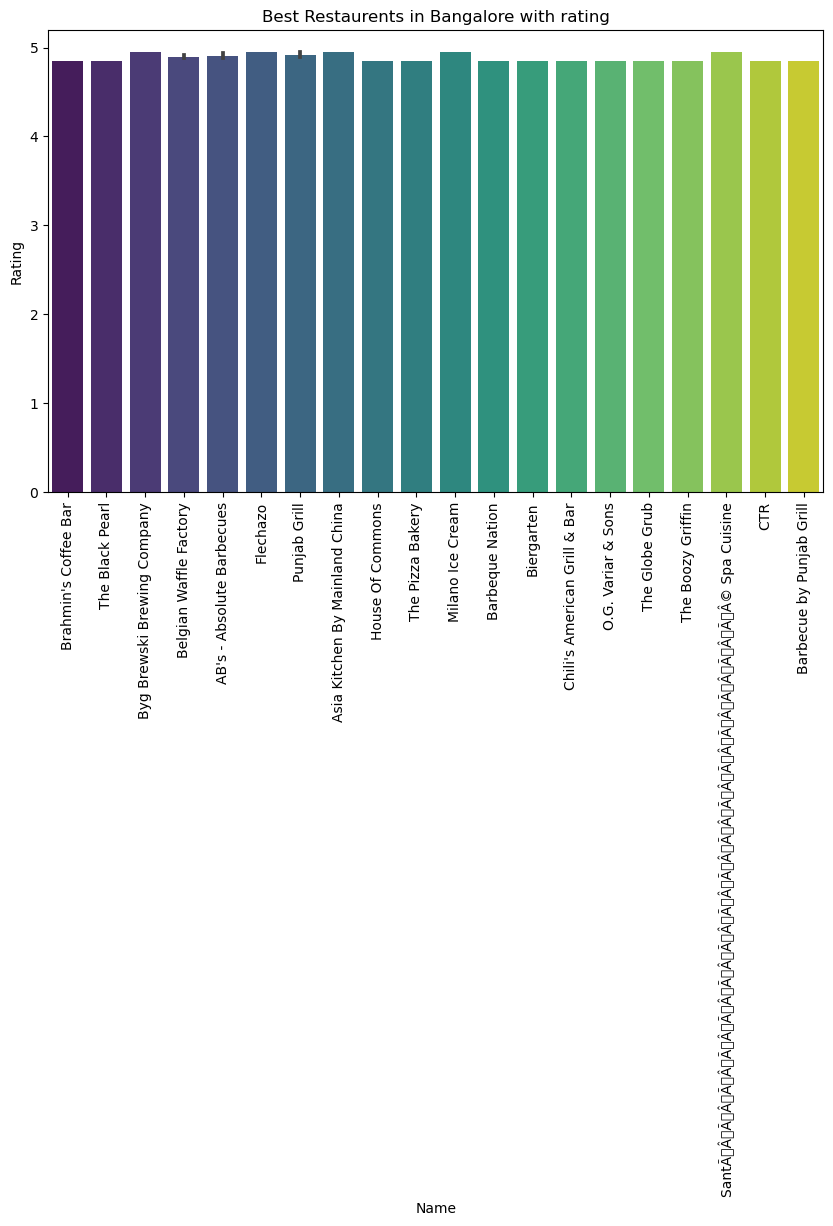

In [47]:
#Best Restaurents in Bangalore with rating
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='rate', data=filtered_df, palette='viridis')
plt.xlabel('Name')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.title('Best Restaurents in Bangalore with rating')
plt.show()

In [48]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

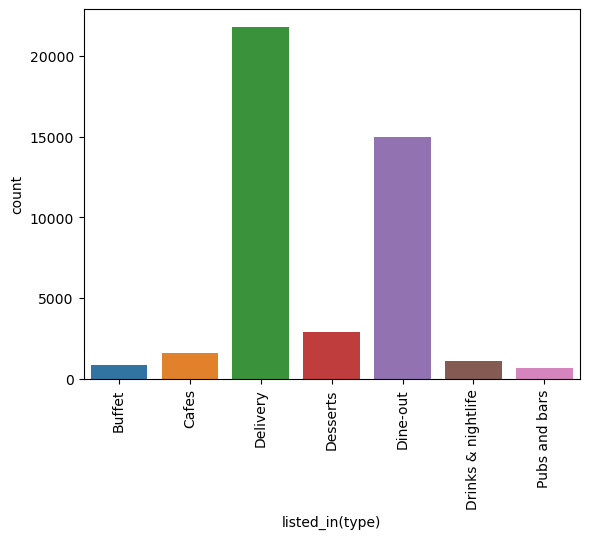

In [49]:
#Types of Services
sns.countplot(x=df['listed_in(type)'])
plt.xticks(rotation=90)
plt.show()

In [50]:
#●	Restaurants delivering Online or not
df['online_order'].value_counts()

online_order
Yes    28302
No     15571
Name: count, dtype: int64

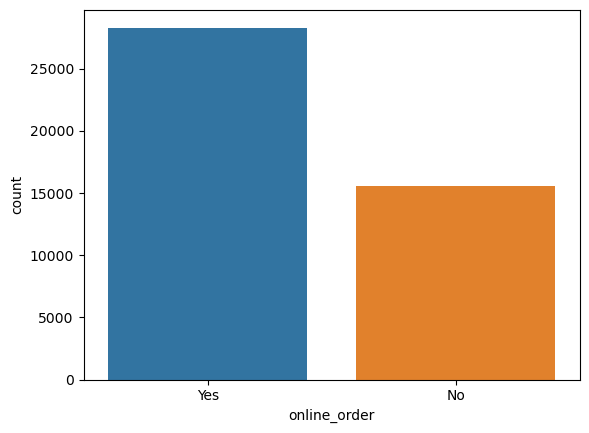

In [51]:
sns.countplot(x=df['online_order'])
plt.show()

In [52]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.15,775,08042297555919743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.15,787,08041714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari


<Axes: xlabel='book_table', ylabel='count'>

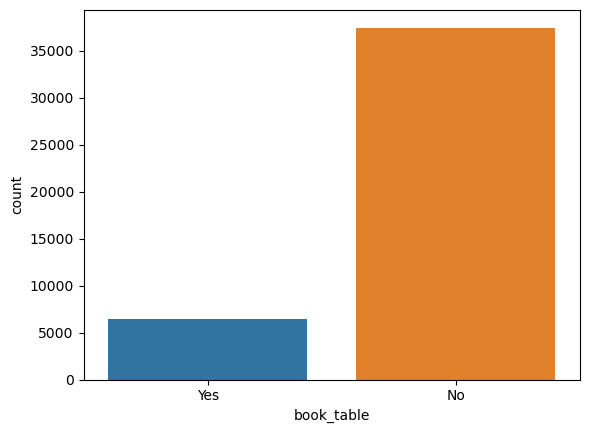

In [53]:
#●	Restaurants allowing table booking or not
sns.countplot(x=df['book_table'])

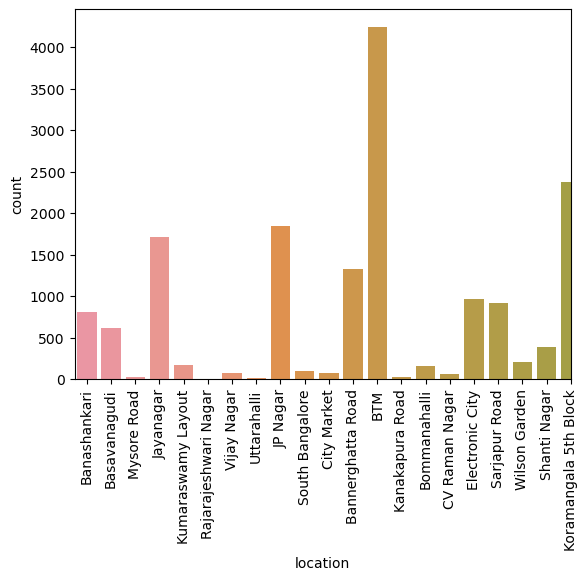

In [54]:
#●	Best Location
sns.countplot(x=df['location'])
plt.xticks(rotation=90)
plt.xlim(-0.5, 20)
plt.show()

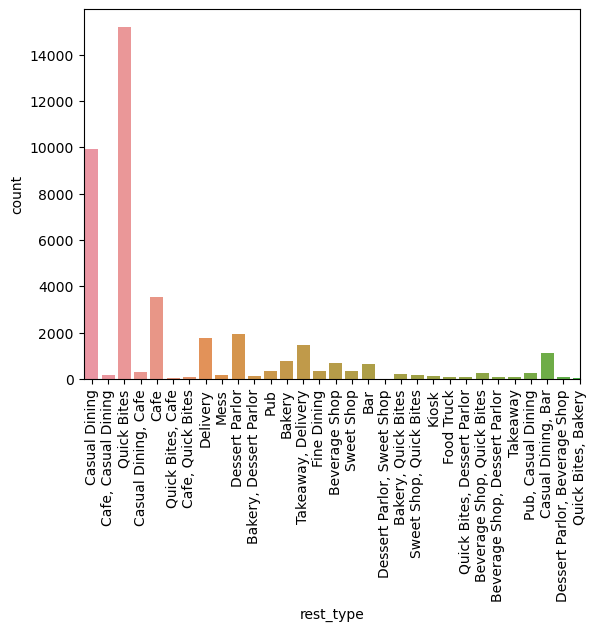

In [55]:
#	Restaurant Type
sns.countplot(x=df['rest_type'])
plt.xticks(rotation=90)
plt.xlim(-0.5, 30)
plt.show()

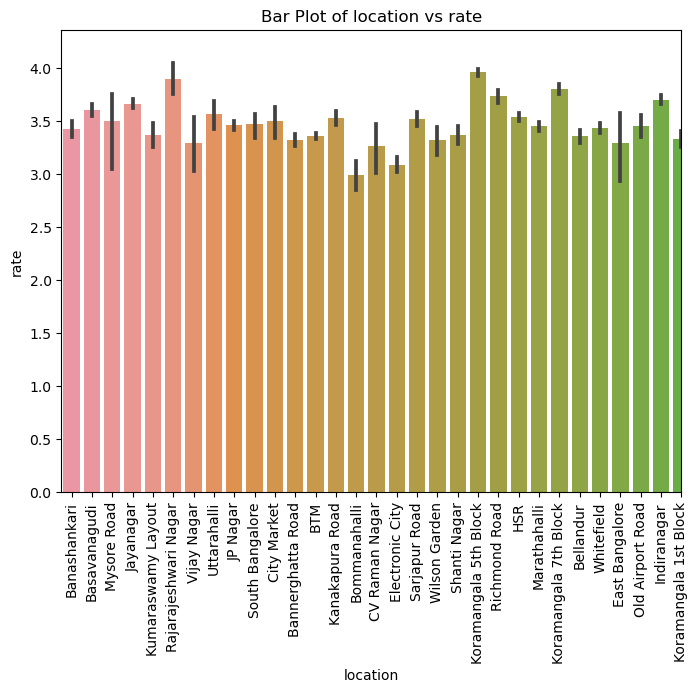

In [56]:
##location vs rate
plt.figure(figsize=(8, 6))
sns.barplot(x='location', y='rate', data=df)
plt.xlim(-0.5, 30)
plt.xticks(rotation=90)
plt.title('Bar Plot of location vs rate')
plt.show()

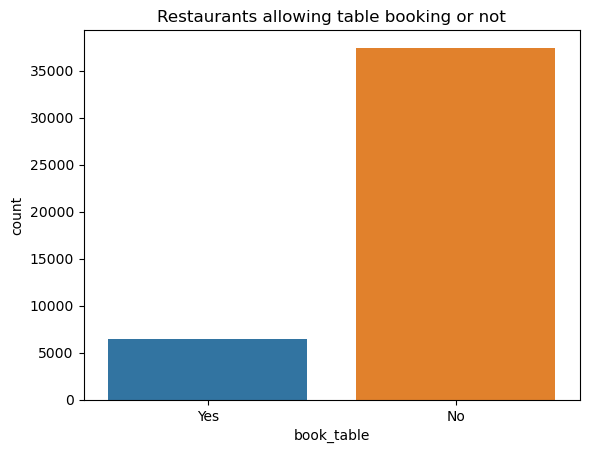

In [57]:
#Restaurants allowing table booking or not
sns.countplot(x=df['book_table'])

plt.title('Restaurants allowing table booking or not')

plt.show()

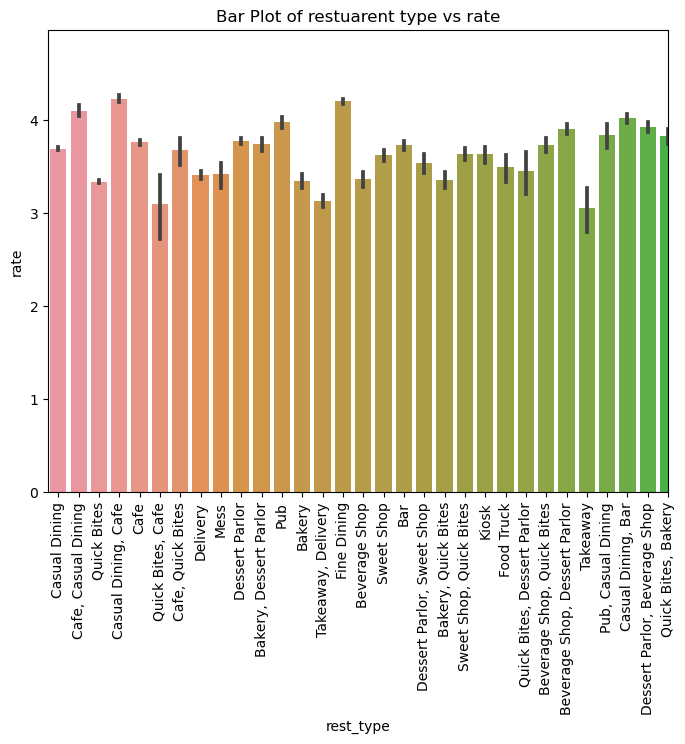

In [58]:
#	Gaussian Rest type and Rating
plt.figure(figsize=(8, 6))
sns.barplot(x='rest_type', y='rate', data=df)
plt.xlim(-0.5, 30)
plt.xticks(rotation=90)
plt.title('Bar Plot of restuarent type vs rate')
plt.show()


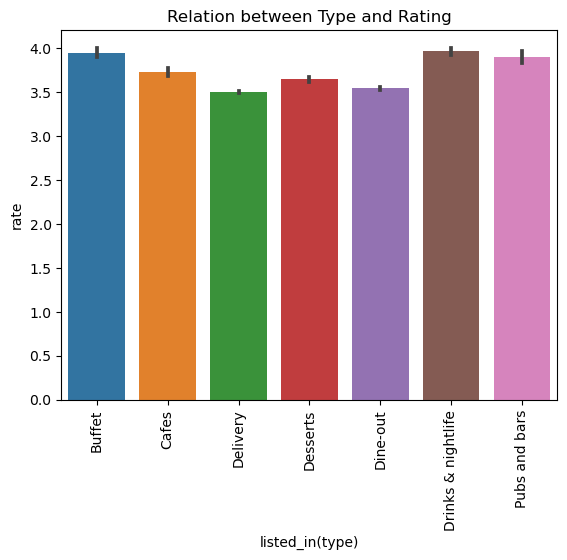

In [59]:
#●	Relation between Type and Rating
sns.barplot(x='listed_in(type)',y='rate',data=df)

plt.xticks(rotation=90)

plt.title('Relation between Type and Rating')

plt.show()


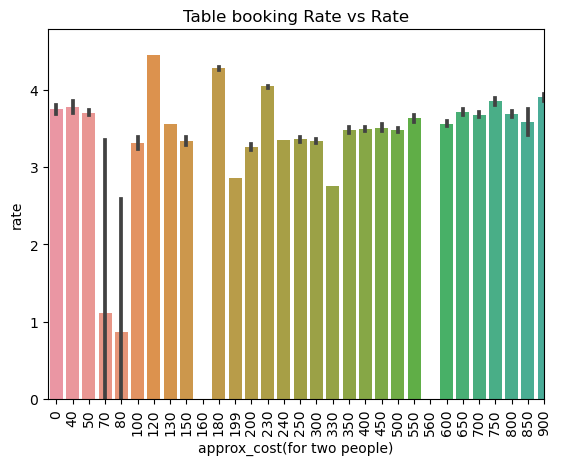

In [71]:
#Table booking Rate vs Rate
sns.barplot(x='approx_cost(for two people)',y='rate',data=df)
plt.xlim(-0.5, 30)
plt.xticks(rotation=90)

plt.title('Table booking Rate vs Rate')

plt.show()

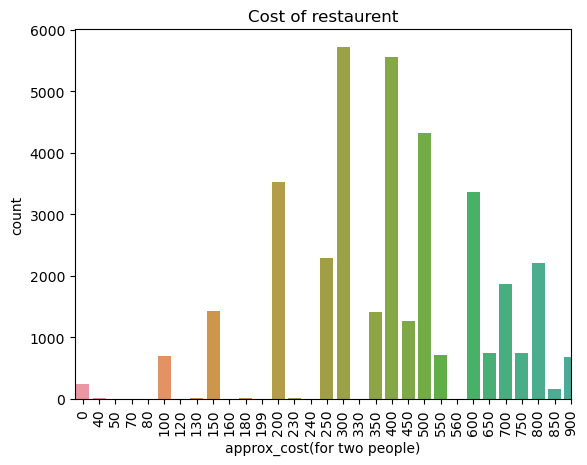

In [61]:
#Cost of restaurent
sns.countplot(x=df['approx_cost(for two people)'])
plt.xlim(-0.5, 30)
plt.xticks(rotation=90)

plt.title('Cost of restaurent')

plt.show()

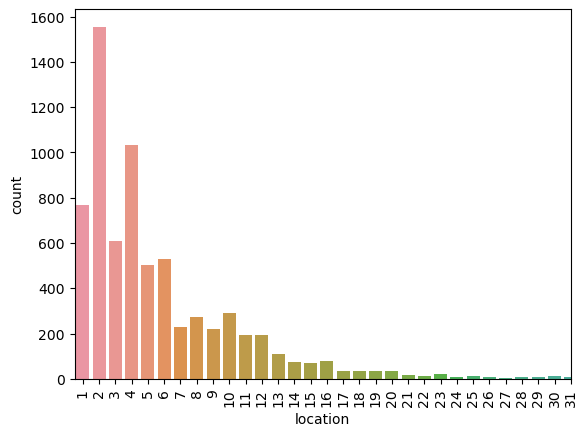

In [62]:
#No. of restaurants in a Location
sns.countplot(x=df.groupby('name')['location'].count())
plt.xlim(-0.5, 30)
plt.xticks(rotation=90)
plt.show()

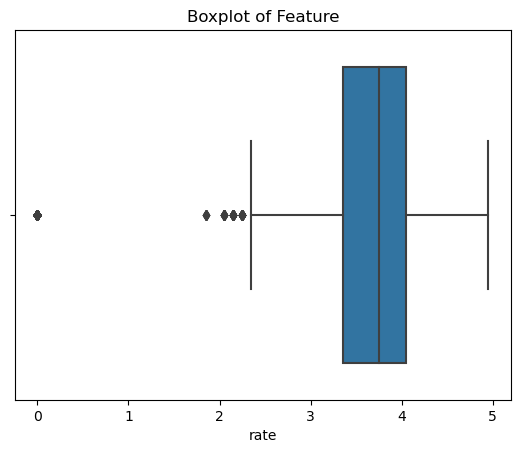

In [64]:
sns.boxplot(x=df['rate'])
plt.title('Boxplot of Feature')
plt.show()

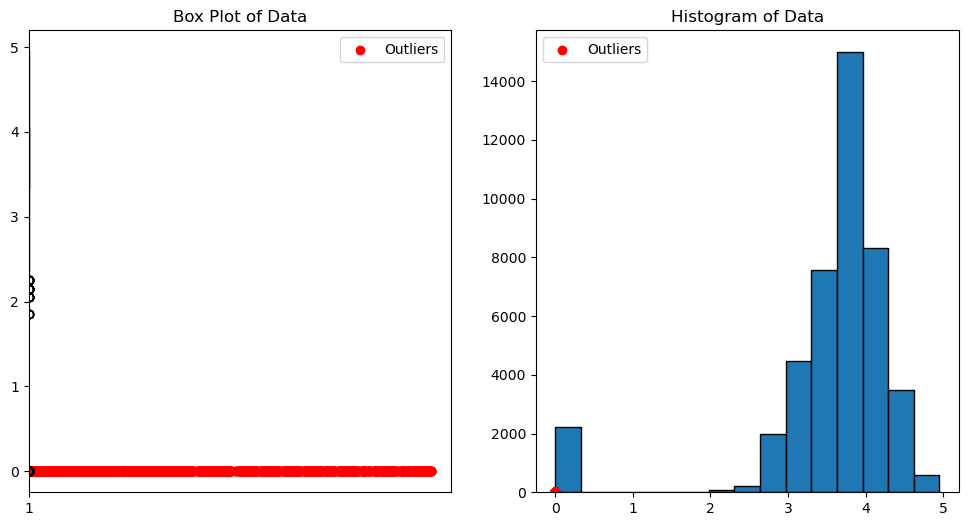

In [65]:
#remove the outliers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


# Calculate Z-scores
df['Z-Score'] = np.abs(stats.zscore(df['rate']))

# Define threshold for Z-score
threshold = 3

# Identify outliers
outliers = df[df['Z-Score'] > threshold]

# Visualize outliers
plt.figure(figsize=(12, 6))

# Box Plot
plt.subplot(1, 2, 1)
plt.boxplot(df['rate'])
plt.title('Box Plot of Data')

# Highlight outliers
plt.scatter(outliers.index + 1, outliers['rate'], color='red', label='Outliers')
plt.legend()

# Histogram
plt.subplot(1, 2, 2)
plt.hist(df['rate'], bins=15, edgecolor='black')
plt.title('Histogram of Data')

# Highlight outliers
plt.scatter(outliers['rate'], np.zeros_like(outliers['rate']), color='red', label='Outliers')
plt.legend()

plt.show()


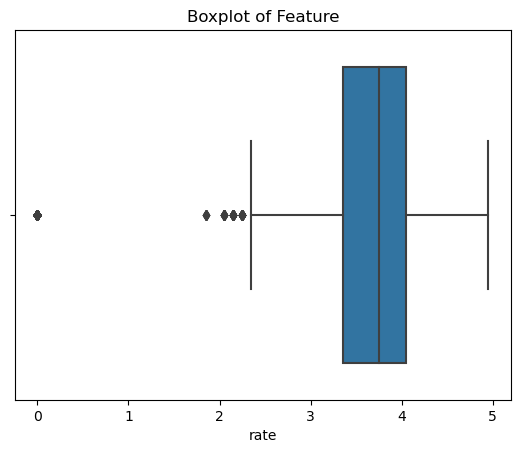

In [66]:
sns.boxplot(x=df['rate'])
plt.title('Boxplot of Feature')
plt.show()

In [68]:
df['rate'].dtype

dtype('float64')

In [69]:
# Identify columns with non-numeric values
non_numeric_columns = df.select_dtypes(exclude=['float64']).columns
print(non_numeric_columns)


Index(['url', 'address', 'name', 'online_order', 'book_table', 'votes',
       'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')


In [70]:
# Convert categorical variables into numerical values using one-hot encoding
dfnew = pd.get_dummies(df, drop_first=True)


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Take a subset of your data
data_subset = dfnew.sample(frac=0.1, random_state=42)

# Split data into features (X) and target variable (y)
X = data_subset.drop('rate', axis=1)
y = data_subset['rate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))
print('R-squared:', r2_score(y_test, y_pred))



Mean Absolute Error: 0.1369409986650726
Mean Squared Error: 0.035977367428352745
Root Mean Squared Error: 0.1896770081700804
R-squared: 0.9572034357430264


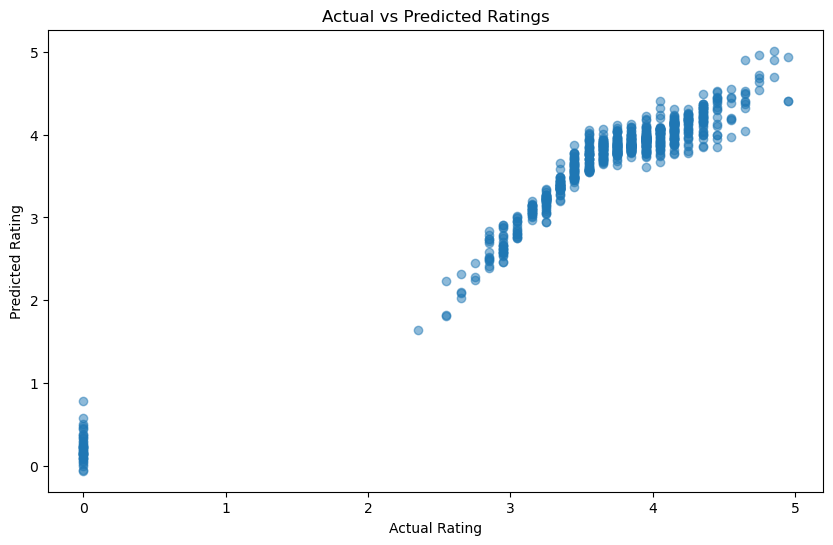

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Ratings')
plt.show()


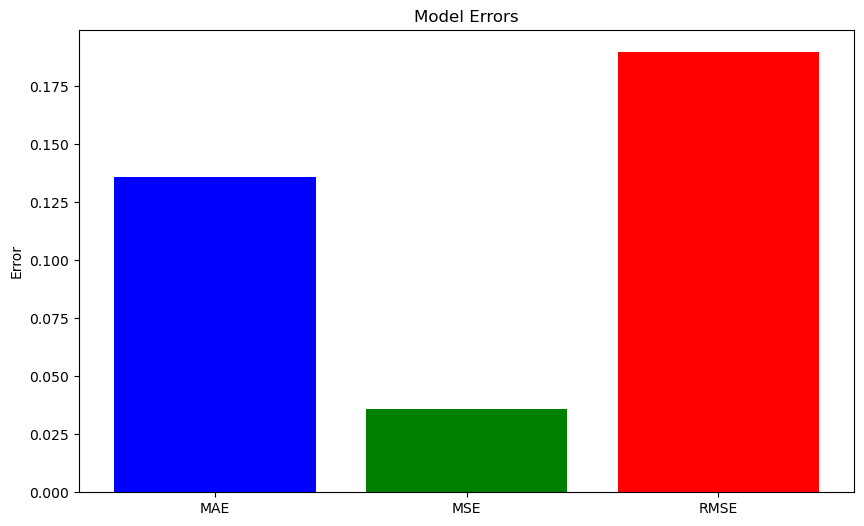

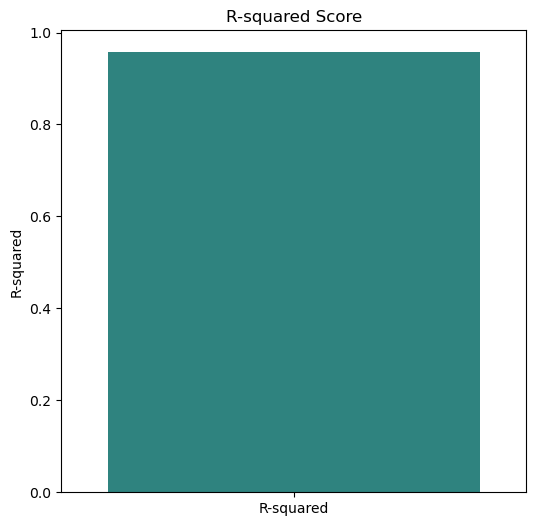

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting MAE, MSE, RMSE
plt.figure(figsize=(10, 6))

# Mean Absolute Error
plt.bar('MAE', 0.136, color='blue')

# Mean Squared Error
plt.bar('MSE', 0.0359, color='green')

# Root Mean Squared Error
plt.bar('RMSE', 0.1896, color='red')

plt.ylabel('Error')
plt.title('Model Errors')
plt.show()

# Plotting R-squared
plt.figure(figsize=(6, 6))
sns.barplot(x=['R-squared'], y=[ 0.957], palette='viridis')
plt.ylabel('R-squared')
plt.title('R-squared Score')
plt.show()
